In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
data = pd.read_csv('../data/base.csv', delimiter=",")
data.head()
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fecha                          640 non-null    str    
 1   referencia                     640 non-null    str    
 2   alcalinidad_total              93 non-null     str    
 3   aluminio                       233 non-null    str    
 4   bario                          12 non-null     str    
 5   bicarbonatos                   71 non-null     str    
 6   cadmio                         404 non-null    str    
 7   calcio                         13 non-null     str    
 8   carbonatos                     71 non-null     str    
 9   cianuro_libre                  121 non-null    float64
 10  cloruros                       27 non-null     str    
 11  cobre                          374 non-null    str    
 12  coliformes_termotolerantes     550 non-null    str    
 13  c

In [48]:
# Ajustes de base de datos
# 1. Convertir todo lo posible a numérico, ignorando errores (los vuelve NaN)
cols_a_limpiar = data.columns.drop(['fecha', 'referencia', 'obs'])
for col in cols_a_limpiar:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '.').str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# 2. Eliminar columnas con más del 50% de nulos
umbral = len(data) * 0.5
data_fixed = data.copy().dropna(thresh=umbral, axis=1)

data_fixed.head()
data_fixed.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fecha                       640 non-null    str    
 1   referencia                  640 non-null    str    
 2   cadmio                      404 non-null    float64
 3   cobre                       374 non-null    float64
 4   coliformes_termotolerantes  530 non-null    float64
 5   coliformes_totales          542 non-null    float64
 6   cromo                       409 non-null    float64
 7   dbo5                        577 non-null    float64
 8   dqo                         611 non-null    float64
 9   hierro                      383 non-null    float64
 10  manganeso                   350 non-null    float64
 11  niquel                      388 non-null    float64
 12  ph                          593 non-null    float64
 13  plomo                       404 non-null    fl

In [49]:
# 3. Imputar nulos restantes con la mediana (simple y robusto)
# data_fixed = data_fixed.fillna(data.median(numeric_only=True))

# Definimos el imputador (n_neighbors=5 es un buen estándar)
imputer = KNNImputer(n_neighbors=5)

# Seleccionamos solo las columnas numéricas que sobrevivieron a la limpieza
cols_numericas = data_fixed.select_dtypes(include=[np.number]).columns

# Solo aplicamos a las columnas numéricas que decidiste conservar
data_imputed = imputer.fit_transform(data_fixed[cols_numericas])

# Convertimos de nuevo a DataFrame
data_fixed = pd.DataFrame(data_imputed, columns=cols_numericas)
data_fixed['fecha'] = data['fecha']
data_fixed['referencia'] = data['referencia']

data_fixed.head()

,cadmio,cobre,coliformes_termotolerantes,coliformes_totales,cromo,dbo5,dqo,hierro,manganeso,niquel,ph,plomo,solidos_suspendidos,solidos_totales,zinc,fecha,referencia
0,0.5,1.00,3.0,3.0,2.0,0.68,11.81,1.883,0.05285,4.0,8.20,10.0,41.0,313.0,0.13530,06/04/01,P1
1,0.5,1.00,2.2,7.0,2.0,0.18,23.42,5.179,0.16410,4.0,8.36,10.0,185.0,453.0,0.09056,06/04/01,P2
2,0.5,1.00,7.0,1.7,2.0,0.48,19.68,6.043,0.20470,4.0,8.47,10.0,209.0,470.0,0.09999,06/04/01,P3
3,0.5,1.00,1.1,1.1,2.0,0.58,7.87,3.159,0.09761,4.0,8.34,10.0,74.0,350.0,0.09698,06/04/01,P4
4,0.5,2.89,1.3,1.3,2.0,0.35,7.75,1.093,0.03675,5.2,8.44,10.0,0.0,293.0,0.11720,07/04/01,P1


In [50]:
data_fixed.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cadmio                      640 non-null    float64
 1   cobre                       640 non-null    float64
 2   coliformes_termotolerantes  640 non-null    float64
 3   coliformes_totales          640 non-null    float64
 4   cromo                       640 non-null    float64
 5   dbo5                        640 non-null    float64
 6   dqo                         640 non-null    float64
 7   hierro                      640 non-null    float64
 8   manganeso                   640 non-null    float64
 9   niquel                      640 non-null    float64
 10  ph                          640 non-null    float64
 11  plomo                       640 non-null    float64
 12  solidos_suspendidos         640 non-null    float64
 13  solidos_totales             640 non-null    fl

In [51]:
data_fixed.describe()

,cadmio,cobre,coliformes_termotolerantes,coliformes_totales,cromo,dbo5,dqo,hierro,manganeso,niquel,ph,plomo,solidos_suspendidos,solidos_totales,zinc
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,16.412789,48.139164,3.555098,3.700673,239.366849,43.617541,29.661643,20.044042,2.701869,217.540489,7.986397,88.644828,201.082876,259.314082,1.693862
std,28.889761,57.361994,2.149515,2.280998,244.287804,126.286695,74.074895,37.965192,7.786169,182.393447,0.547537,74.341066,235.078847,620.203804,13.499864
min,0.500000,1.000000,1.000000,1.100000,1.020000,0.000000,1.085000,0.003000,0.001000,1.117000,5.480000,1.026000,0.000000,2.164000,0.000800
25%,10.000000,10.000000,1.800000,1.700000,20.000000,1.000000,9.133800,1.888250,0.080000,50.000000,7.724000,50.000000,11.850000,15.216000,0.050000
50%,10.100000,31.850000,3.270000,3.300000,172.600000,3.400000,19.944500,8.380000,0.463000,195.404200,8.100000,64.200000,126.740000,50.088000,0.469840
75%,18.805000,69.630000,4.900000,4.900000,444.343000,14.226000,27.944000,20.436000,1.664000,378.360000,8.352500,100.000000,311.355150,428.600000,1.390305
max,482.800000,569.140000,9.400000,9.400000,989.200000,990.000000,891.000000,394.000000,84.600000,970.400000,9.080000,670.400000,2320.000000,13710.000000,332.000000


<Axes: xlabel='fecha', ylabel='solidos_suspendidos'>

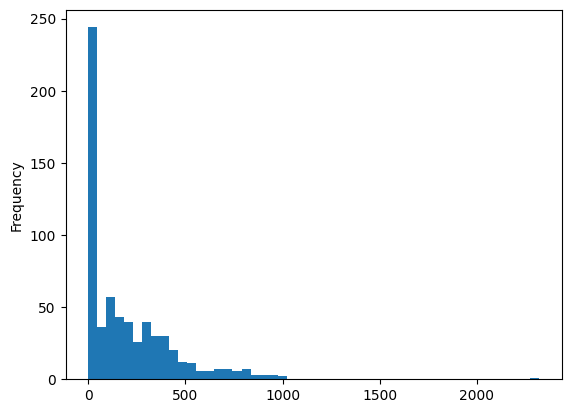

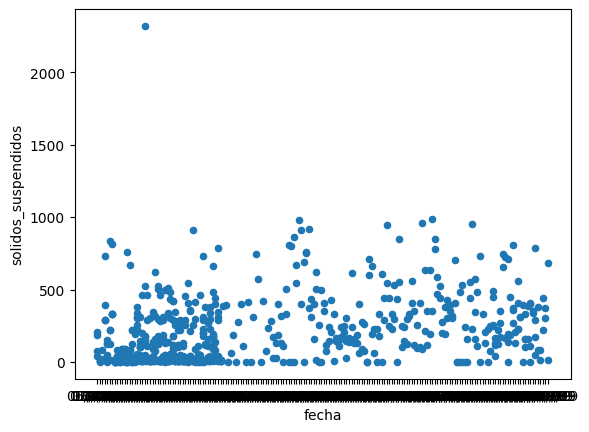

In [52]:
column_name = 'solidos_suspendidos'
data_fixed[column_name].plot(kind="hist", bins=50)
data_fixed.plot(kind="scatter",y=column_name, x="fecha")


### Preparación Obligatoria: Estandarización

El PCA es extremadamente sensible a las escalas. Si la DQO tiene valores de 500 y el pH de 7, el PCA creerá que la DQO es más importante solo por ser un número más grande. Debes llevar todo a la misma escala (media 0, varianza 1).

In [53]:
# Análisis de Componentes Principales (PCA)
# 1. Seleccionamos solo las columnas numéricas que sobrevivieron a la limpieza
df_numeric = data_fixed.select_dtypes(include=[np.number])

# 2. Estandarización (Crucial para PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

### Aplicar el PCA

No sabemos cuántos componentes necesitamos inicialmente, así que primero ajustamos el modelo con todos para analizar la Varianza Explicada.

In [54]:
# Inicializamos PCA sin límite de componentes para analizar
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

# Calculamos la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Buscamos cuántos componentes necesitamos para cubrir, por ejemplo, el 85% de la info
n_componentes = np.argmax(varianza_acumulada >= 0.85) + 1
print(f"Necesitas {n_componentes} componentes para explicar el 85% de los datos.")

Necesitas 10 componentes para explicar el 85% de los datos.


### Reducción Final y Visualización

Una vez que sabes cuántos componentes son útiles (supongamos que son 3), transformas tu base de datos original en una nueva tabla mucho más ligera para tu ANN.

In [ ]:
# Aplicamos PCA con el número óptimo de componentes
pca_final = PCA(n_components=n_componentes)
componentes_principales = pca_final.fit_transform(data_scaled)

# Convertimos a DataFrame para que sea fácil de usar en la ANN
df_pca = pd.DataFrame(
    data=componentes_principales, 
    columns=[f'PC{i+1}' for i in range(n_componentes)]
)

# Recuperar columnas de identificación (opcional pero recomendado)
# Si 'data_fixed' mantiene el mismo orden de filas:
df_pca.insert(0, 'fecha', data_fixed['fecha'].values)
df_pca.insert(1, 'referencia', data_fixed['referencia'].values)

# Guardar el archivo en tu directorio actual
nombre_archivo = "cpa_data.csv"
df_pca.to_csv(nombre_archivo, index=False, sep=',', encoding='utf-8')
print(f"¡Archivo guardado con éxito como: {nombre_archivo}!")

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.172840,-0.521445,-0.444831,-0.162855,-0.399744,-0.048975,-0.092430,-0.233617,-0.031675,0.210330
1,-1.989673,-0.561169,0.142021,0.416451,-0.991852,0.092949,0.053050,0.800244,-0.385982,-0.617666
2,-2.154176,-0.100730,-0.214204,0.996446,0.892430,0.249675,-0.490614,-0.794934,0.128861,1.030285
3,-2.238051,-0.316221,-1.208847,-0.959316,-0.314796,-0.046410,0.342104,-0.369822,0.130015,0.186329
4,-2.375187,-0.322874,-0.971796,-0.991752,-0.346266,-0.070763,0.227969,-0.403109,0.282735,0.107680


### Extraer los "Loadings" del PCA

Después de ajustar tu PCA, puedes acceder a la matriz components_.

In [56]:
# Suponiendo que 'pca_final' es tu objeto PCA ya entrenado
# y 'data_numeric_only' son tus columnas originales antes de la transformación

loadings = pd.DataFrame(
    pca_final.components_.T,           # Transponemos la matriz de componentes
    columns=[f'PC{i+1}' for i in range(n_componentes)], # Nombres de los PCs
    index=df_numeric.columns    # Nombres de tus químicos/variables
)

# Mostramos las variables que más influyen en el PC1
# print(loadings['PC2'].sort_values(ascending=False))
display(loadings)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
cadmio,0.224145,-0.306057,0.258679,-0.250060,0.187772,-0.048180,0.069889,0.113426,0.581174,0.131424
cobre,0.317204,0.220689,-0.071504,0.071651,0.047932,-0.012370,-0.043106,0.230481,0.364261,-0.201485
coliformes_termotolerantes,-0.009042,0.028765,0.370866,0.621089,0.378275,0.050115,-0.345628,-0.259581,0.049898,0.347131
coliformes_totales,0.051281,-0.126804,0.510596,0.361372,-0.431086,-0.005782,-0.080684,0.429010,-0.144298,-0.387598
cromo,0.364479,0.363546,0.057456,-0.114534,-0.082464,-0.065658,-0.071813,0.234063,0.070252,0.230778
dbo5,0.008421,0.184284,0.491459,-0.106672,0.154535,-0.242553,0.692680,-0.118861,-0.273784,0.087511
dqo,-0.003284,-0.240160,0.094408,-0.255591,0.619390,0.217010,-0.157434,0.494390,-0.354624,-0.099024
hierro,0.411849,-0.183345,-0.107170,0.091599,0.119847,0.059567,0.066126,-0.269151,-0.067825,-0.284449
manganeso,0.333565,-0.330284,0.040065,0.001513,-0.164587,-0.178311,0.042754,0.121286,-0.018145,0.488558
niquel,0.329983,0.451997,0.061973,-0.002407,0.043193,0.023500,-0.049812,0.059685,-0.017013,-0.093426


### Interpretación:
- Valores cercanos a 1 o -1: Indican que la variable tiene una influencia muy fuerte en ese componente.
- Valores cercanos a 0: Indican que la variable no aporta casi nada a ese componente.
- Signo (+ o -): Indica la dirección de la relación. Si el PC1 tiene un loading alto positivo para aluminio y hierro, significa que cuando el PC1 sube, ambos metales suelen subir juntos.

### Visualización con un Mapa de Calor (Heatmap)

La forma más fácil de "leer" tu nueva base de datos es con un mapa de calor. Esto te permitirá ver de un vistazo qué parámetros químicos definen cada componente.

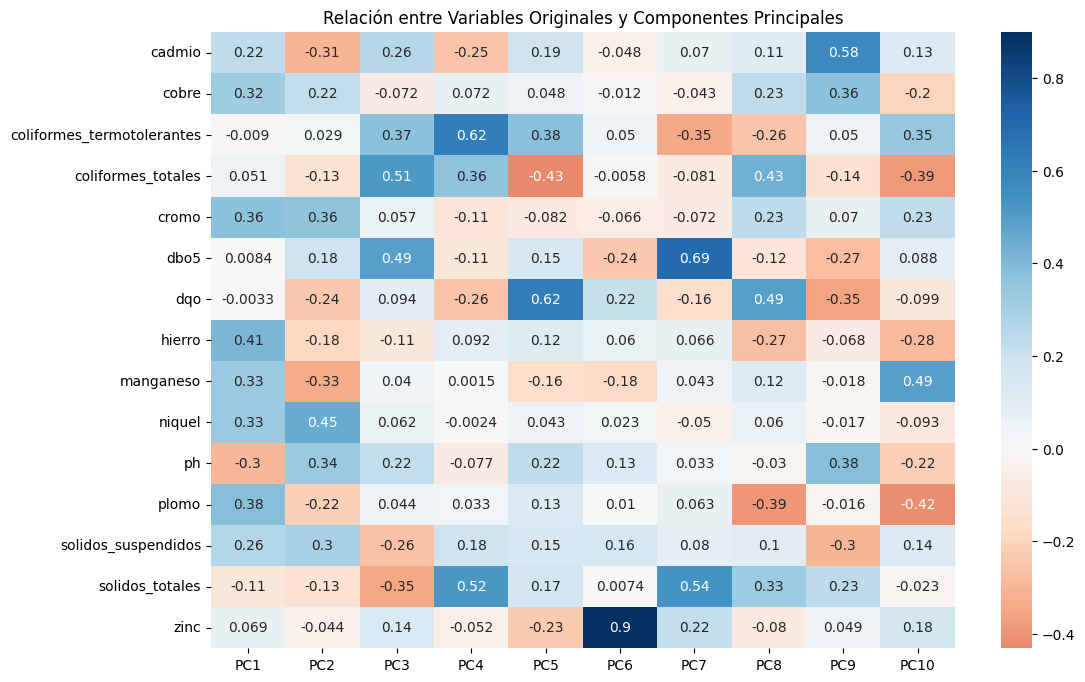

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0)
plt.title('Relación entre Variables Originales y Componentes Principales')
plt.show()